In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import random_statevector

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

In [3]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")

In [4]:
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>

In [5]:
tel=QuantumCircuit(qr, crz, crx)
tel.append(Initialize(psi),[0])
tel.h(1)
tel.cx(1,2)
tel.barrier()
tel.cx(0,1)
tel.barrier()
tel.h(0)
tel.barrier()
tel.measure(0,0)
tel.measure(1,1)
tel.barrier()
tel.x(2).c_if(crx, 1) 
tel.z(2).c_if(crz, 1) 
tel.draw()

┌─────────────────────────────────────────────────┐      ░       ░ ┌───┐»
  q_0: ┤ Initialize(0.92329-0.041674j,-0.30455-0.23032j) ├──────░───■───░─┤ H ├»
       └──────────────────────┬───┬──────────────────────┘      ░ ┌─┴─┐ ░ └───┘»
  q_1: ───────────────────────┤ H ├─────────────────────────■───░─┤ X ├─░──────»
                              └───┘                       ┌─┴─┐ ░ └───┘ ░      »
  q_2: ───────────────────────────────────────────────────┤ X ├─░───────░──────»
                                                          └───┘ ░       ░      »
crz: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
crx: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
«        ░ ┌─┐    ░               
«  q_0: ─░─┤M├────░───────────────
«        ░ └╥┘┌─┐ ░               
«  q_1: ─░──╫─┤M├─░───────────────
«        ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
«  q_2: ─░──╫──╫──░──┤ X ├──┤ Z ├─
«        ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
«           ║  ║       ║   ┌──╨──┐
«crz: 1/════╩══╬═══════╬═══╡ 0x1 ╞
«           0  ║    ┌──╨──┐└─────┘
«crx: 1/═══════╩════╡ 0x1 ╞═══════
«              0    └─────┘

<IPython.core.display.Latex object>

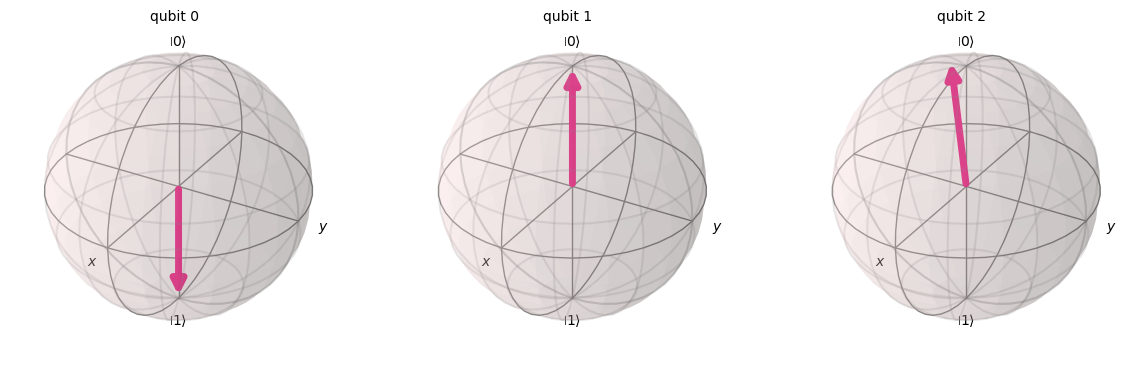

In [6]:
sim = Aer.get_backend('aer_simulator')
tel.save_statevector()
out_vector = sim.run(tel).result().get_statevector()
display(array_to_latex(out_vector, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(out_vector)